In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time
from datetime import datetime as dt

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [4]:
temp = []
Humid = [] 
Cloudy = []
Wind_Speed = []
Lat = []
Lng = []
foundcities = []
Date = []


for city in cities:
    params = {
        'appid' : api_key,
        'q' : city,
        'units' : 'imperal'
    }
    print(" finding weather for " +city)
    try:
        response = requests.get(url, params=params).json()
        Lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        Humid.append(response['main']['humidity'])
        Cloudy.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        foundcities.append(response['name'])
        print("found")
    except KeyError:
        print("City " + city + " not found")

    
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

 finding weather for georgetown
found
 finding weather for mataura
found
 finding weather for cape town
found
 finding weather for kaitangata
found
 finding weather for punta arenas
found
 finding weather for jumla
found
 finding weather for ushuaia
found
 finding weather for busselton
found
 finding weather for batagay-alyta
found
 finding weather for bethel
found
 finding weather for chuy
found
 finding weather for nemuro
found
 finding weather for kalasin
found
 finding weather for tiksi
found
 finding weather for airai
found
 finding weather for constitucion
found
 finding weather for bredasdorp
found
 finding weather for opuwo
found
 finding weather for vila franca do campo
found
 finding weather for mahebourg
found
 finding weather for korla
City korla not found
 finding weather for neuquen
found
 finding weather for hermanus
found
 finding weather for leshukonskoye
found
 finding weather for santa maria
found
 finding weather for ust-tsilma
found
 finding weather for ixtapa
foun

found
 finding weather for samusu
City samusu not found
 finding weather for pevek
found
 finding weather for coihueco
found
 finding weather for saldanha
found
 finding weather for nikolskoye
found
 finding weather for nantucket
found
 finding weather for mayya
found
 finding weather for guerrero negro
found
 finding weather for thompson
found
 finding weather for uhlove
found
 finding weather for chagda
City chagda not found
 finding weather for belogorsk
found
 finding weather for morehead
found
 finding weather for sosnovo-ozerskoye
found
 finding weather for saskylakh
found
 finding weather for hervey bay
found
 finding weather for sault sainte marie
found
 finding weather for clarence town
found
 finding weather for fiche
found
 finding weather for naifaru
found
 finding weather for carnarvon
found
 finding weather for doctor pedro p. pena
City doctor pedro p. pena not found
 finding weather for dongsheng
found
 finding weather for tautira
found
 finding weather for apastovo
foun

found
 finding weather for we
City we not found
 finding weather for inyonga
found
 finding weather for hamina
found
 finding weather for tamandare
found
 finding weather for saint-louis
found
 finding weather for grand gaube
found
 finding weather for marfino
found
 finding weather for kailua
found
 finding weather for macamic
found
 finding weather for costinesti
found
 finding weather for zharkent
found
 finding weather for paita
found
 finding weather for sao joao da barra
found
 finding weather for garissa
found
 finding weather for zabol
found
 finding weather for port augusta
found
 finding weather for belmonte
found
 finding weather for bartica
found
 finding weather for fairbanks
found
 finding weather for evanston
found
 finding weather for khani
found
 finding weather for artyk
City artyk not found
 finding weather for shenkursk
found
 finding weather for kaiserslautern
found
 finding weather for nizwa
found
 finding weather for languyan
found
 finding weather for iberia
fou

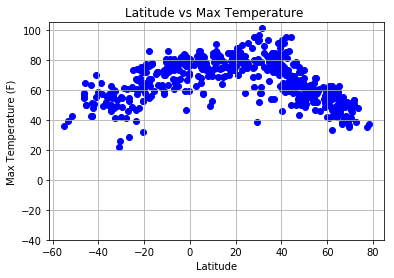

In [5]:
#Build a scatter plot for each data type
plt.scatter([Lat],[temp], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Max Temperature ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

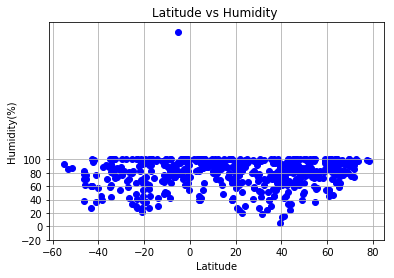

In [6]:
# Build a scatter plot for each data type
plt.scatter([Lat],[Humid], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Humidity ")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))

# # Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

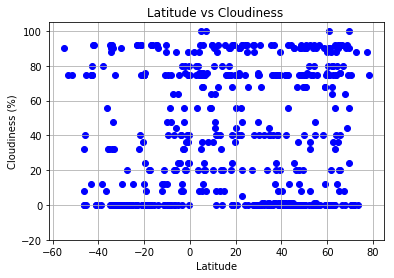

In [7]:
# Build a scatter plot for each data type
plt.scatter([Lat],[Cloudy], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Cloudiness " )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))

# # Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

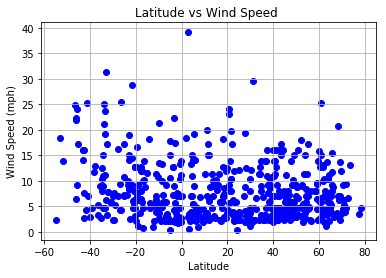

In [8]:
# Build a scatter plot for each data type
plt.scatter([Lat],[Wind_Speed], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Wind Speed ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [25]:
# creating dataframe

cities_weather_df = {'City' : foundcities,
             'Temp (F)' : temp,
             'Humidity (%)' : Humid,
             'Cloud Cover (%)' : Cloudy,
             'Wind Speed (mph)' : Wind_Speed,
             'Latitude' : Lat,
             'Longitude' : Lng
}

cities_weather_df = pd.DataFrame(cities_weather_df)

# set index
cities_weather_df = cities_weather_df.set_index('City')

# write to csv
cities_weather_df.to_csv('cities_weather_data.csv')

ValueError: arrays must all be same length